In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-07-16/r4ds_members.csv')

In [2]:
data.columns

Index(['date', 'total_membership', 'full_members', 'guests',
       'daily_active_members', 'daily_members_posting_messages',
       'weekly_active_members', 'weekly_members_posting_messages',
       'messages_in_public_channels', 'messages_in_private_channels',
       'messages_in_shared_channels', 'messages_in_d_ms',
       'percent_of_messages_public_channels',
       'percent_of_messages_private_channels', 'percent_of_messages_d_ms',
       'percent_of_views_public_channels', 'percent_of_views_private_channels',
       'percent_of_views_d_ms', 'name', 'public_channels_single_workspace',
       'messages_posted'],
      dtype='object')

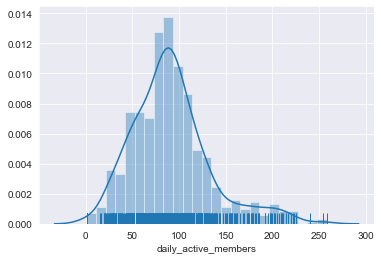

In [3]:
#Choose one variable and plot that variable four different ways.

sns.set_style('darkgrid')
sns.distplot(data.loc[:, 'daily_active_members'], rug=True)
plt.show()

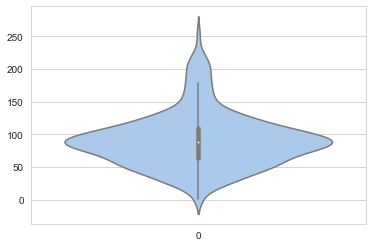

In [4]:
sns.set_style('whitegrid')
sns.violinplot(data=data.loc[:,'daily_active_members'], palette='pastel')
plt.show()

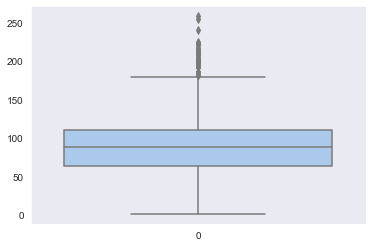

In [9]:
sns.set_style('dark')
sns.boxplot(data=data.loc[:,'daily_active_members'], palette='pastel')
plt.show()

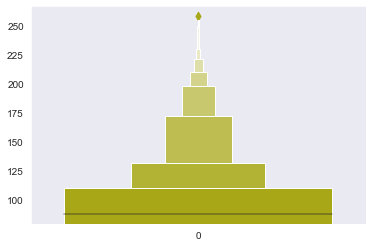

In [10]:
sns.set_style('dark')
sns.boxenplot(data=data.loc[:,'daily_active_members'], color='y')
plt.show()

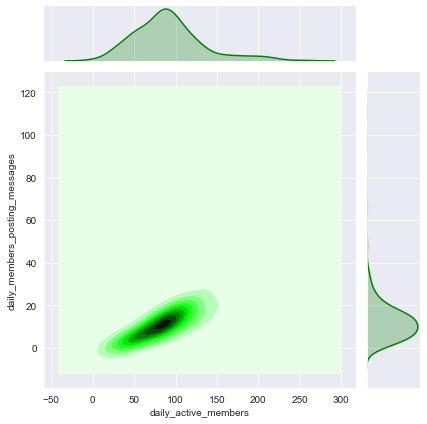

In [11]:
#Choose two continuous variables, and plot them three different ways

sns.set_style('darkgrid')
sns.jointplot(x='daily_active_members', y='daily_members_posting_messages', data=data, kind='kde', color='g')
plt.show()

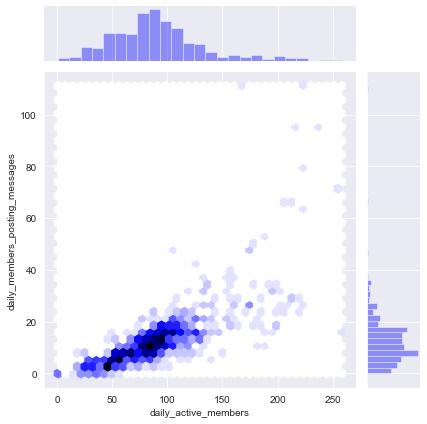

In [12]:
sns.set_style('darkgrid')
sns.jointplot(x='daily_active_members', y='daily_members_posting_messages', data=data, kind='hex', color='b')
plt.show()

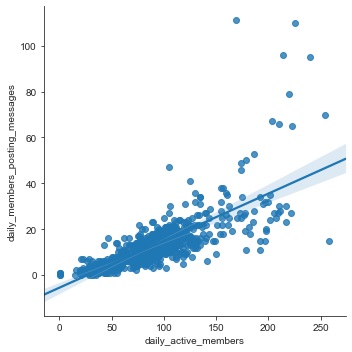

In [13]:
sns.set_style('ticks')
sns.lmplot(x='daily_active_members', y='daily_members_posting_messages', data=data)
plt.show()

In [25]:
#Extract months from date for use as a categorical variable using string slicing

months = []

for date in data.loc[:,'date']:
    months.append(int(date[5:7]))
data['month'] = months

print(data.loc[0,'month'])

#Check to confirm that using datetime format is the same as string slicing
dates = pd.to_datetime(data.loc[:,'date'])

print(dates[0].month)

8
8


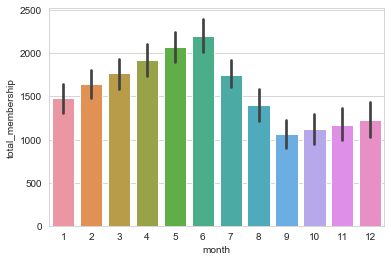

In [11]:
#Choose one continuous variable and one categorical variable, and plot them six different ways

sns.set_style('whitegrid')
sns.set_color_codes('pastel')
sns.barplot(x='month',y='total_membership', data=data)
plt.show()

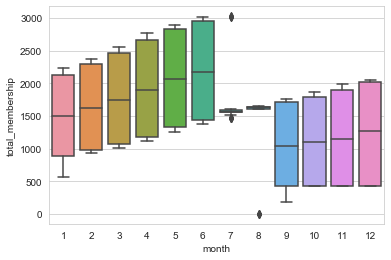

In [12]:
sns.set_style('whitegrid')
sns.set_color_codes('pastel')
sns.boxplot(x='month',y='total_membership', data=data)
plt.show()

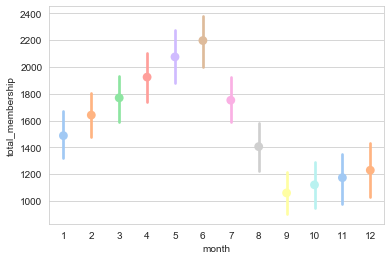

In [13]:
sns.set_style('whitegrid')
sns.pointplot(x='month',y='total_membership', data=data, palette='pastel')
plt.show()

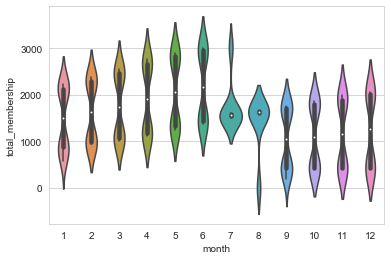

In [14]:
sns.set_style('whitegrid')
sns.set_color_codes('pastel')
sns.violinplot(x='month',y='total_membership', data=data)
plt.show()

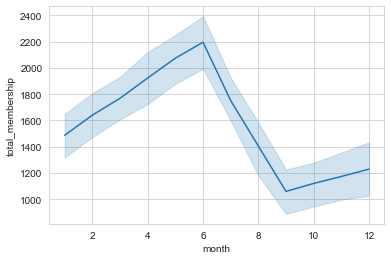

In [15]:
sns.set_style('whitegrid')
sns.lineplot(x='month',y='total_membership', data=data)
plt.show()

The above 5 graphs indicate that there is a dip in membership in August, but this data is taken over 3 years, so perhaps something more interesting is happening here.

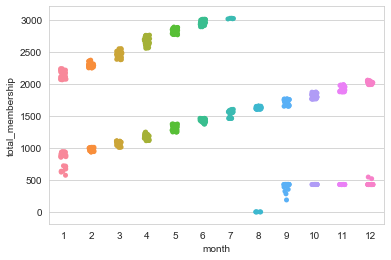

In [16]:
sns.set_style('whitegrid')
sns.stripplot(x='month',y='total_membership', data=data)
plt.show()

Aha, it appears the data began collection in the July/August timeframe and membership has continued to increase month over month

Next- Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

    Probability distributions
    Bivariate relationships
    Whether the distributions or the relationships vary across groups
    Accompany your plot with a written description of what you see.


In [27]:
#Create year data for categorization

years = []
for date in data.loc[:,'date']:
    years.append(int(date[0:4]))
data['year'] = years

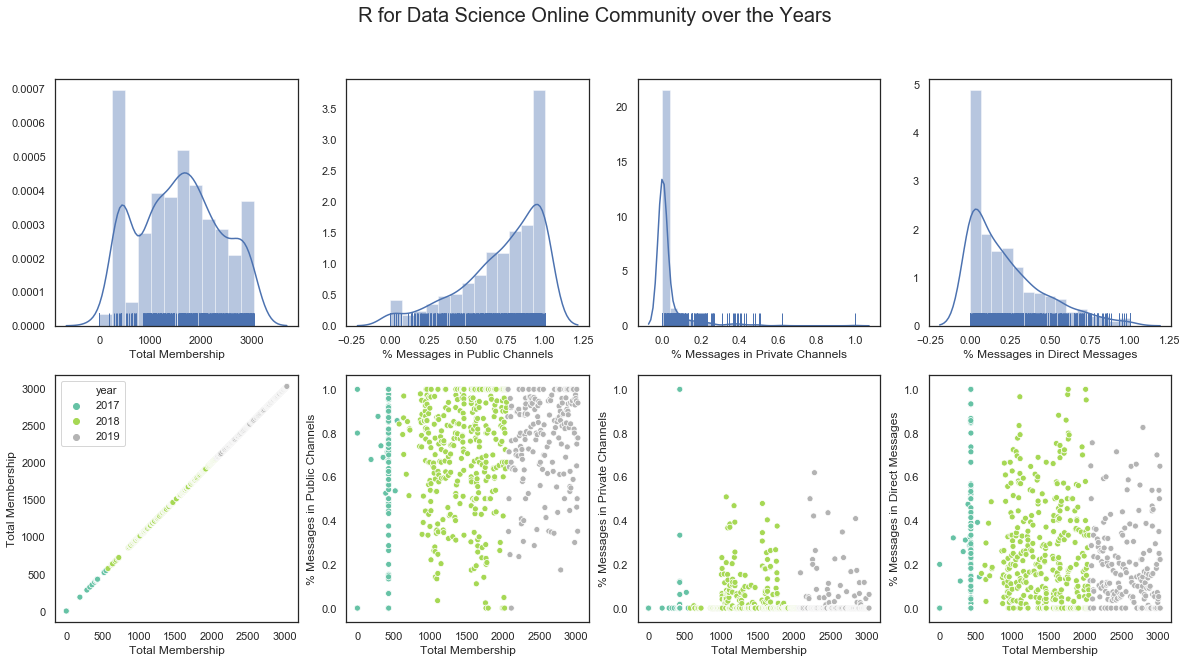

In [86]:
sns.set(style="white")

fig, axes = plt.subplots(2,4,figsize=(20,10))
fig.suptitle('R for Data Science Online Community over the Years', fontsize=20)

#First row- Probability distributions

sns.distplot(data.loc[:, 'total_membership'], rug=True, ax=axes[0,0])

axes[0,0].set_xlabel('Total Membership')

sns.distplot(data.loc[:, 'percent_of_messages_public_channels'], rug=True, ax=axes[0,1])

axes[0,1].set_xlabel('% Messages in Public Channels')

sns.distplot(data.loc[:, 'percent_of_messages_private_channels'], rug=True, ax=axes[0,2])

axes[0,2].set_xlabel('% Messages in Private Channels')

sns.distplot(data.loc[:, 'percent_of_messages_d_ms'], rug=True,ax=axes[0,3])

axes[0,3].set_xlabel('% Messages in Direct Messages')

#Second row- Bivariate relationships & Group categorization

sns.scatterplot(x='total_membership', 
                y='total_membership', 
                hue='year', 
                legend='full',
                data=data, 
                palette='Set2', 
                ax=axes[1,0])

axes[1,0].set_ylabel('Total Membership')
axes[1,0].set_xlabel('Total Membership')

sns.scatterplot(x='total_membership', 
                y='percent_of_messages_public_channels', 
                hue='year', 
                data=data, 
                legend=False,
                palette='Set2', 
                ax=axes[1,1])

axes[1,1].set_ylabel('% Messages in Public Channels')
axes[1,1].set_xlabel('Total Membership')

sns.scatterplot(x='total_membership', 
                y='percent_of_messages_private_channels', 
                hue='year', 
                data=data, 
                legend=False,
                palette='Set2', 
                ax=axes[1,2])

axes[1,2].set_ylabel('% Messages in Private Channels')
axes[1,2].set_xlabel('Total Membership')

sns.scatterplot(x='total_membership', 
                y='percent_of_messages_d_ms', 
                hue='year', 
                legend=False,
                data=data, 
                palette='Set2', 
                ax=axes[1,3])

axes[1,3].set_ylabel('% Messages in Direct Messages')
axes[1,3].set_xlabel('Total Membership')

plt.show()

Total memberships consistently increase across time. The largest percentage of messages are found in public channels, with smaller percentages in direct messages and the smallest in private channels. There may be slightly positive linear relationships between Total Memberships and % Messages in Public Channels and Total Memberships and % Messages in Private Channels. There may be slightly negative linear relationships between Total Memberships and % Messages in Direct Messages. However, all of these relationships show large amounts of variability and it is difficult to determine if the relationships are attributed to time or to Total Membership as these variables are tightly correlated.